In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/AnthonyM/Documents/credit_risk_dataset.csv")

df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [3]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [5]:
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 85)]

In [6]:
df.shape

(32575, 12)

In [7]:
df['person_age'].max()

84

In [8]:
df.loc[df['person_emp_length'] > 40, 'person_emp_length'] = np.nan

In [9]:
df['person_emp_length'].describe()

count    31677.000000
mean         4.781040
std          4.029885
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         38.000000
Name: person_emp_length, dtype: float64

In [10]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [11]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [12]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 32575 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32575 non-null  int64  
 1   person_income               32575 non-null  int64  
 2   person_home_ownership       32575 non-null  object 
 3   person_emp_length           32575 non-null  float64
 4   loan_intent                 32575 non-null  object 
 5   loan_grade                  32575 non-null  object 
 6   loan_amnt                   32575 non-null  int64  
 7   loan_int_rate               32575 non-null  float64
 8   loan_status                 32575 non-null  int64  
 9   loan_percent_income         32575 non-null  float64
 10  cb_person_default_on_file   32575 non-null  object 
 11  cb_person_cred_hist_length  32575 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781796
1    0.218204
Name: proportion, dtype: float64

In [14]:
pd.crosstab(
    df['cb_person_default_on_file'],
    df['loan_status'],
    normalize='index'
)

loan_status,0,1
cb_person_default_on_file,,
N,0.816027,0.183973
Y,0.621932,0.378068


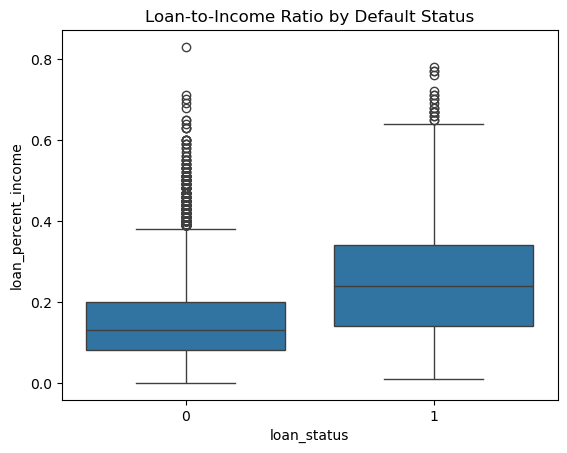

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Loan-to-Income Ratio by Default Status')
plt.show()

In [16]:
pd.crosstab(
    df['loan_grade'],
    df['loan_status'],
    normalize='index'
).sort_index()

loan_status,0,1
loan_grade,,
A,0.900436,0.099564
B,0.837194,0.162806
C,0.792564,0.207436
D,0.409542,0.590458
E,0.355809,0.644191
F,0.294606,0.705394
G,0.015625,0.984375


In [17]:
pd.crosstab(
    df['cb_person_default_on_file'],
    df['loan_status'],
    normalize='index'
)

loan_status,0,1
cb_person_default_on_file,,
N,0.816027,0.183973
Y,0.621932,0.378068


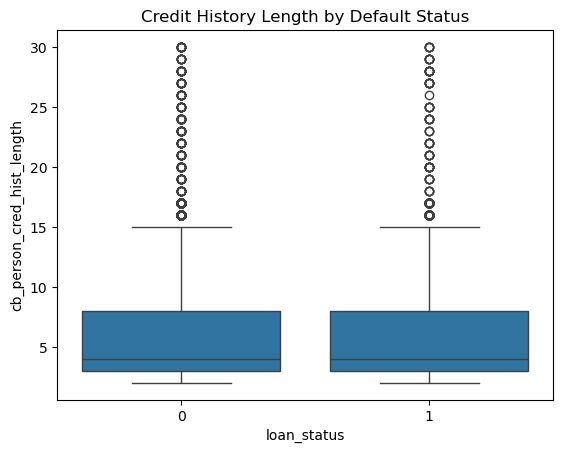

In [18]:
sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df)
plt.title('Credit History Length by Default Status')
plt.show()

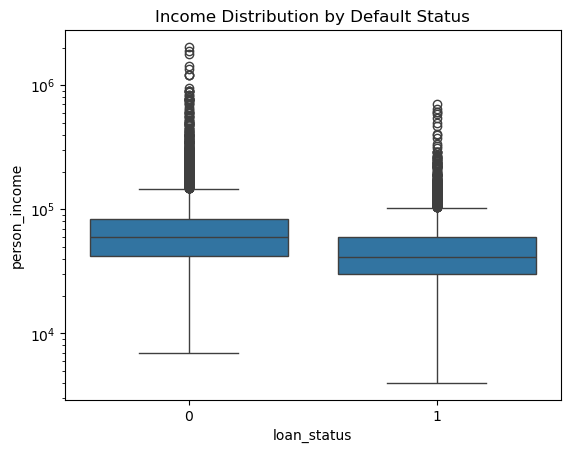

In [19]:
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.yscale('log')  # optional, income is skewed
plt.title('Income Distribution by Default Status')
plt.show()